In [182]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('honeyproduction.csv')
data.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [183]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
state          626 non-null object
numcol         626 non-null float64
yieldpercol    626 non-null int64
totalprod      626 non-null float64
stocks         626 non-null float64
priceperlb     626 non-null float64
prodvalue      626 non-null float64
year           626 non-null int64
dtypes: float64(5), int64(2), object(1)
memory usage: 39.2+ KB


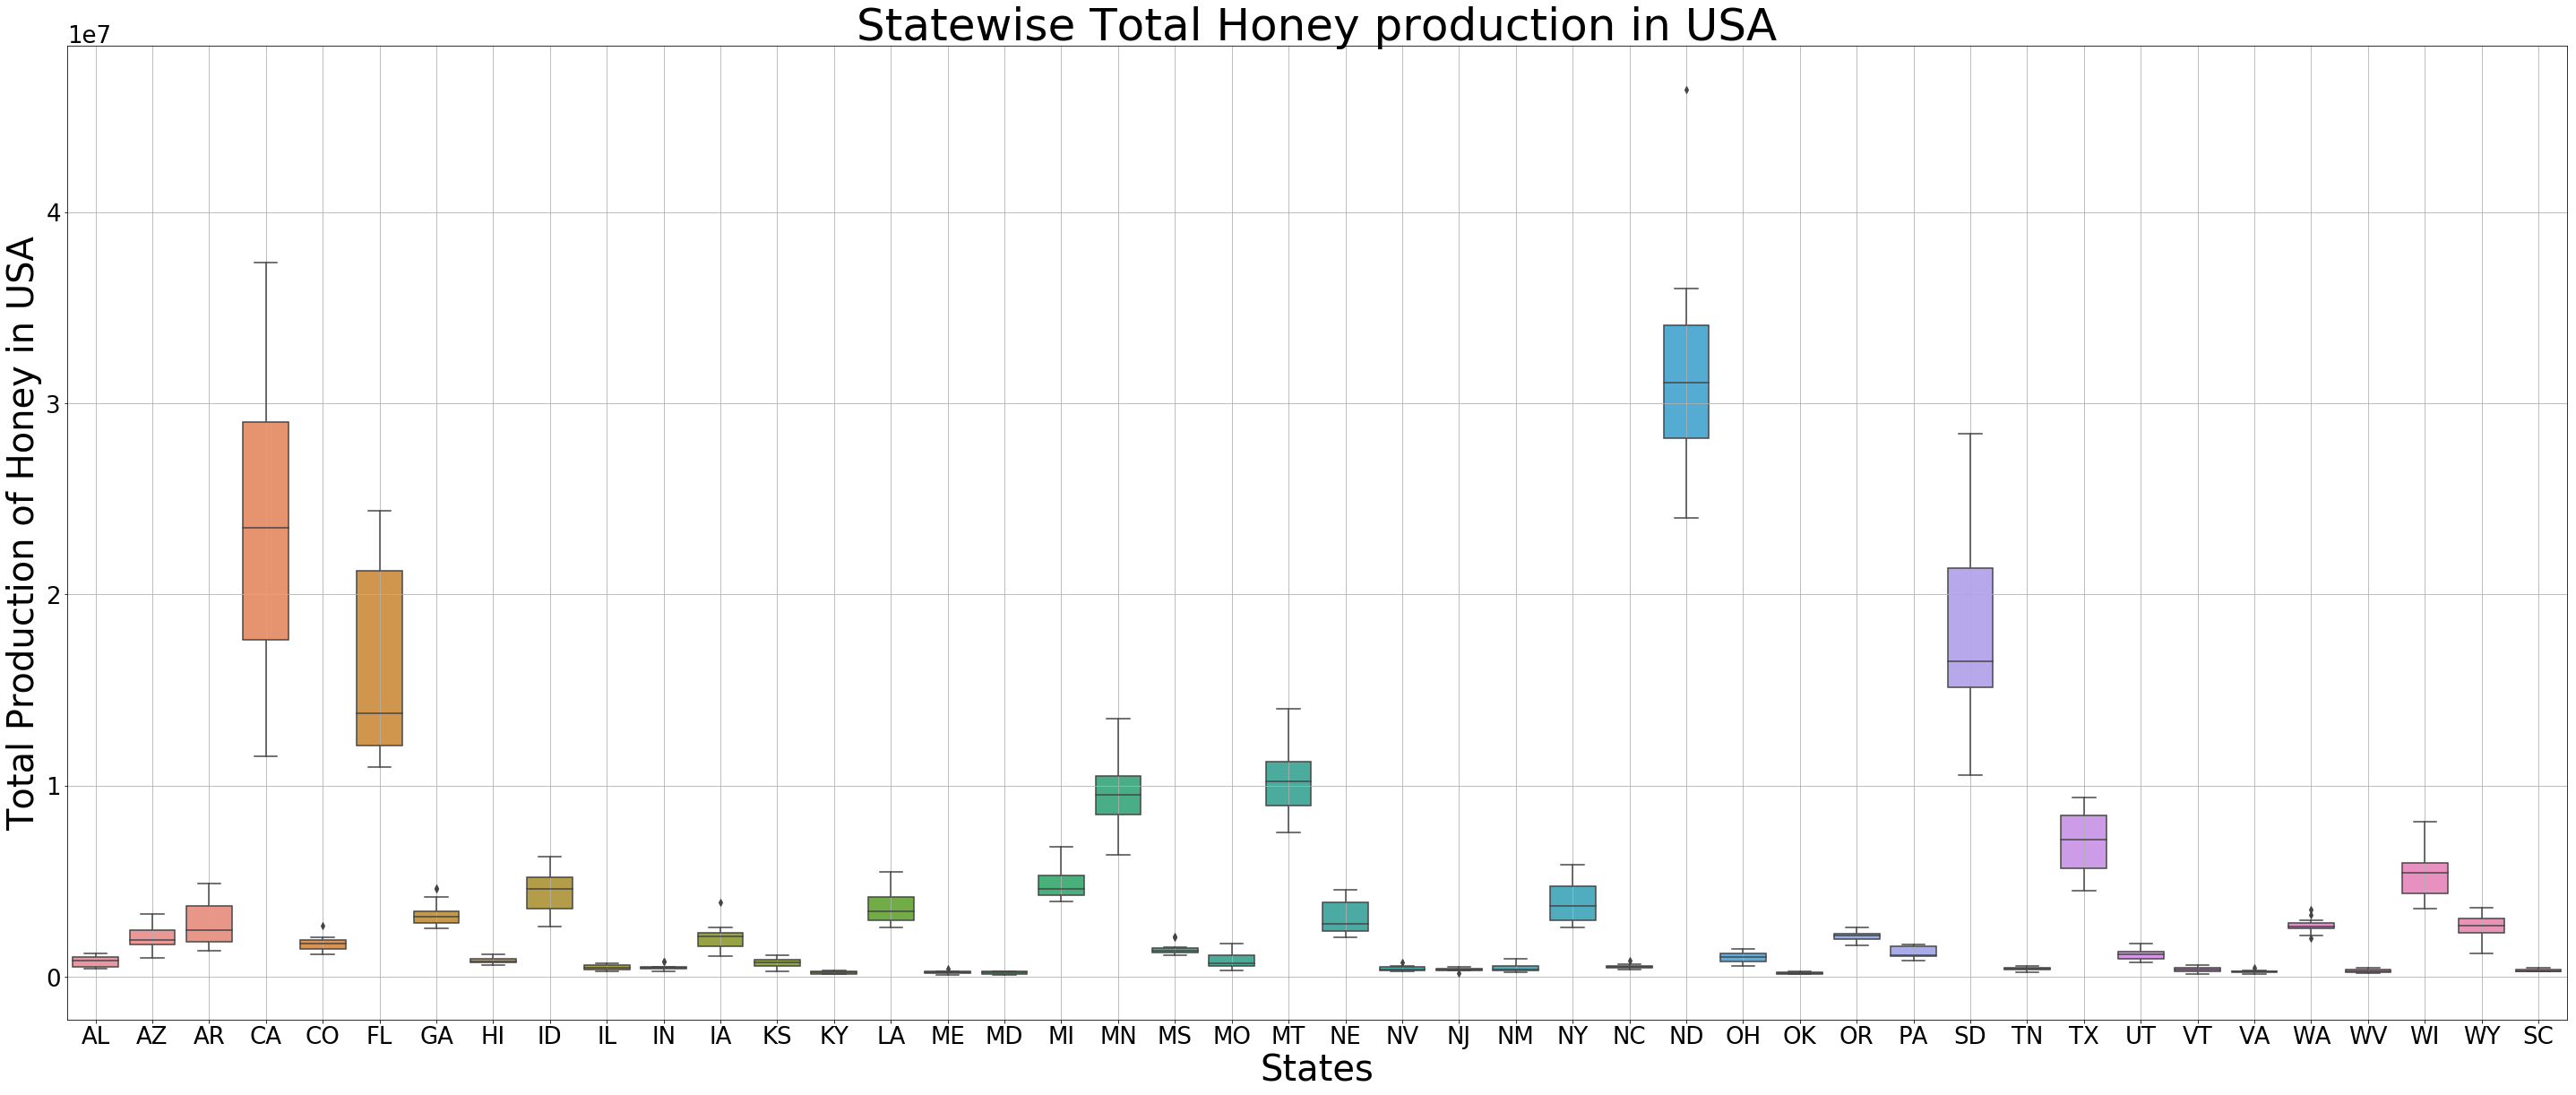

In [184]:
plt.figure(figsize=(50,20))
sns.boxplot(x=data.state,y = data.totalprod)
plt.title('Statewise Total Honey production in USA',fontsize =50)
plt.xlabel('States',fontsize=40)
plt.ylabel('Total Production of Honey in USA',fontsize=40)
plt.grid(True)
plt.rc('ytick',labelsize=26)
plt.rc('xtick',labelsize=26)


+ We can see that the states North Dakota(ND) and California(CA) stand out as major honey production states from 1998-2012

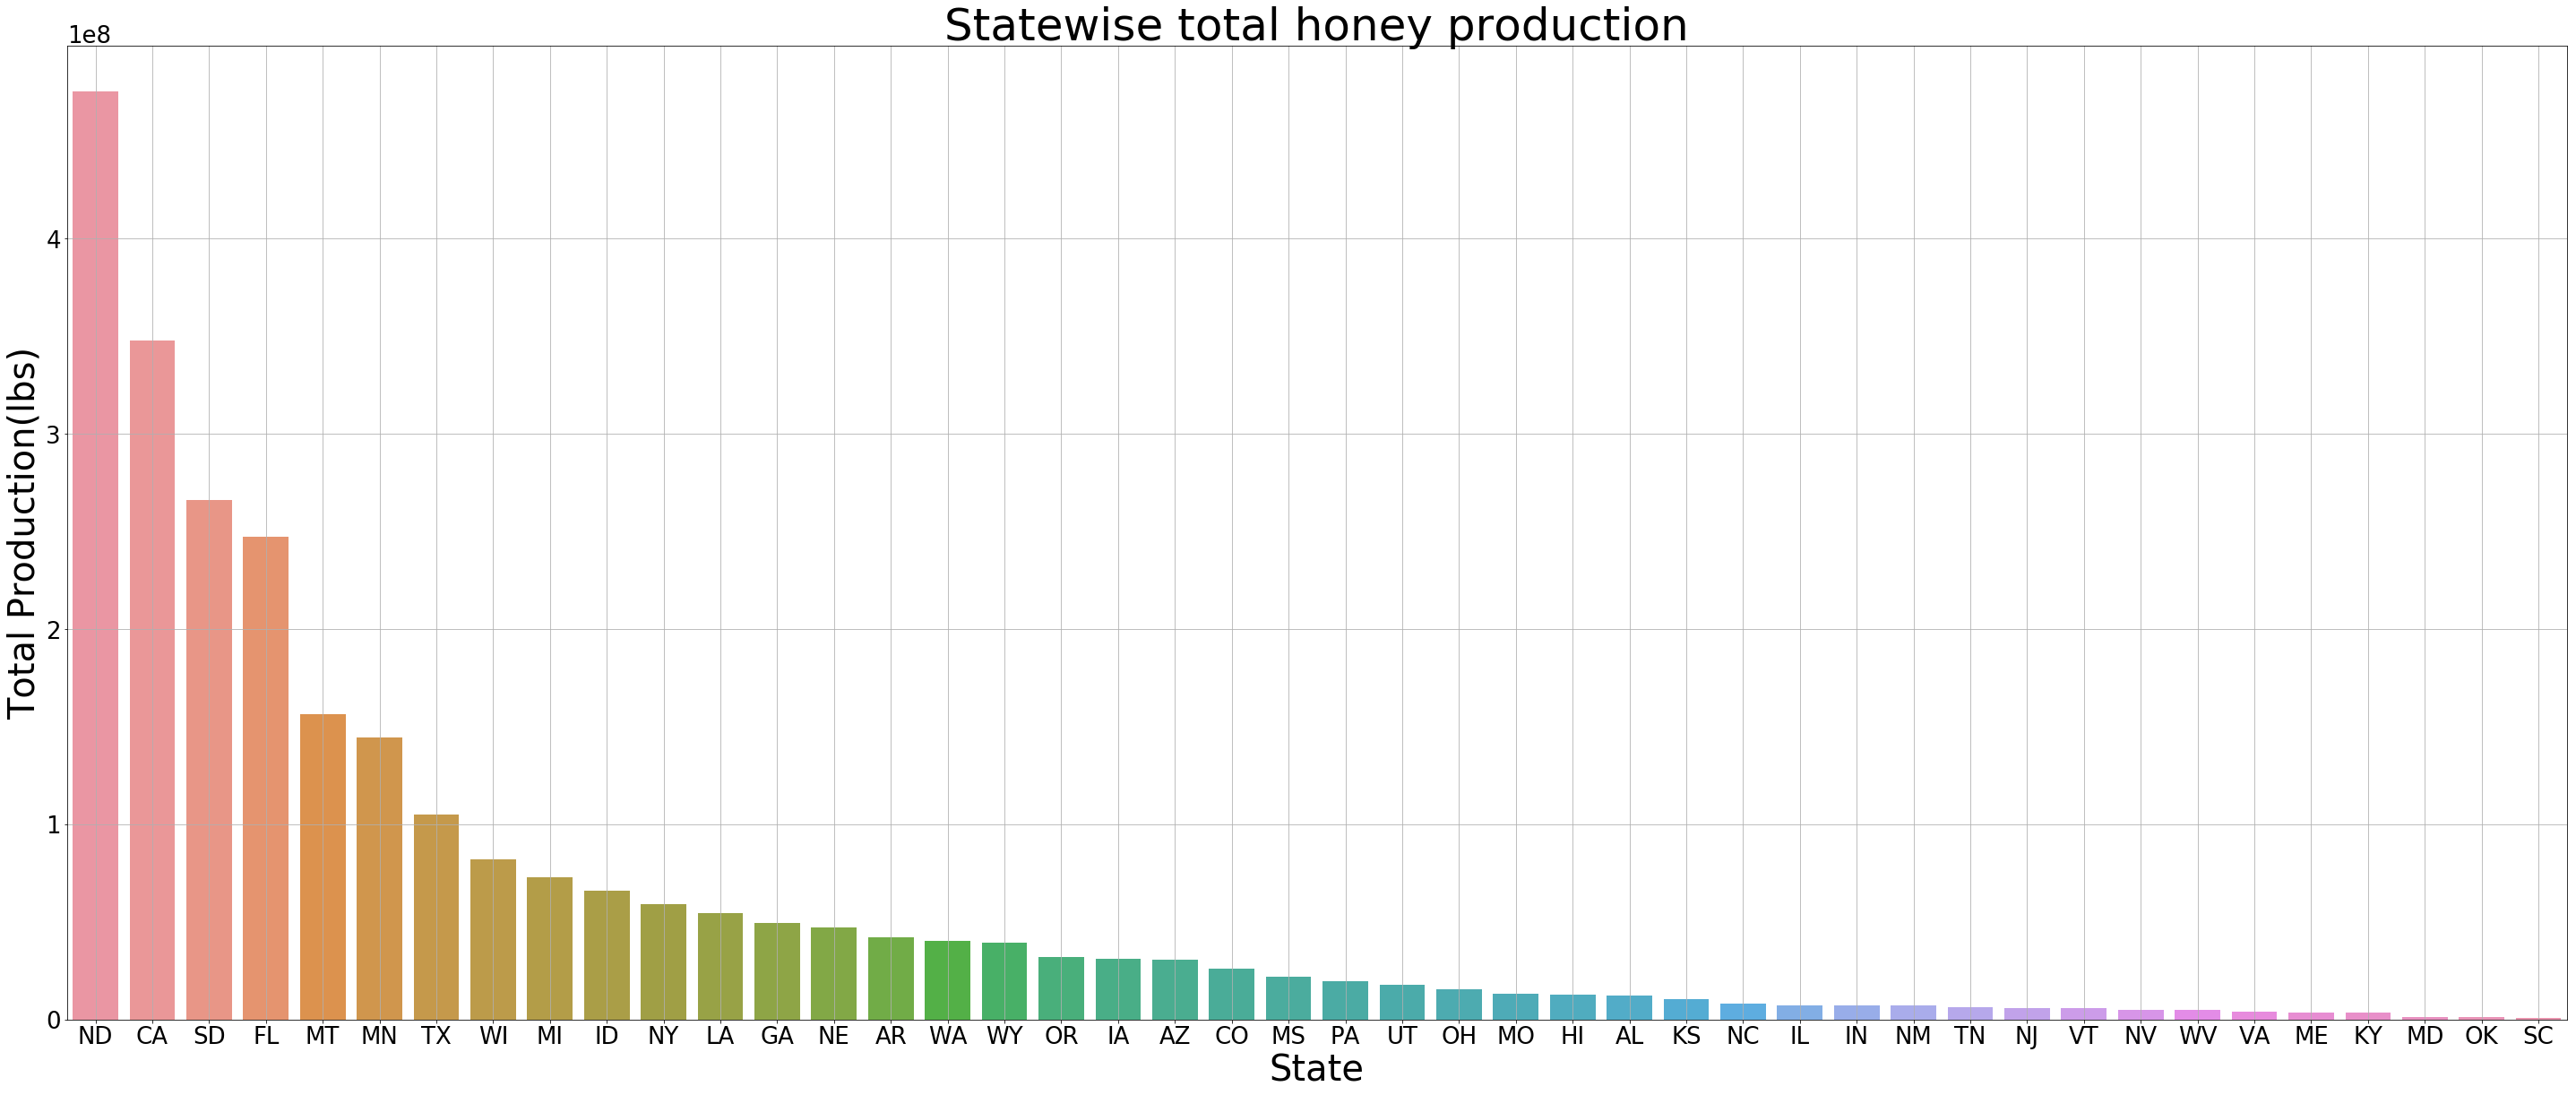

In [185]:
# Analyzing the major and minor honey production states in the year over the period 1998-2012
total_byState =data[['totalprod','state']].groupby('state').sum()
total_byState.reset_index(level=0, inplace=True)
total_byState.sort_values(by='totalprod',ascending=False,inplace=True)

plt.figure(figsize=(50,20))
sns.barplot(x=total_byState['state'],y=total_byState['totalprod'])
plt.title('Statewise total honey production',fontsize = 50)
plt.xlabel('State',fontsize = 40)
plt.ylabel('Total Production(lbs)',fontsize = 40)
plt.grid(True)

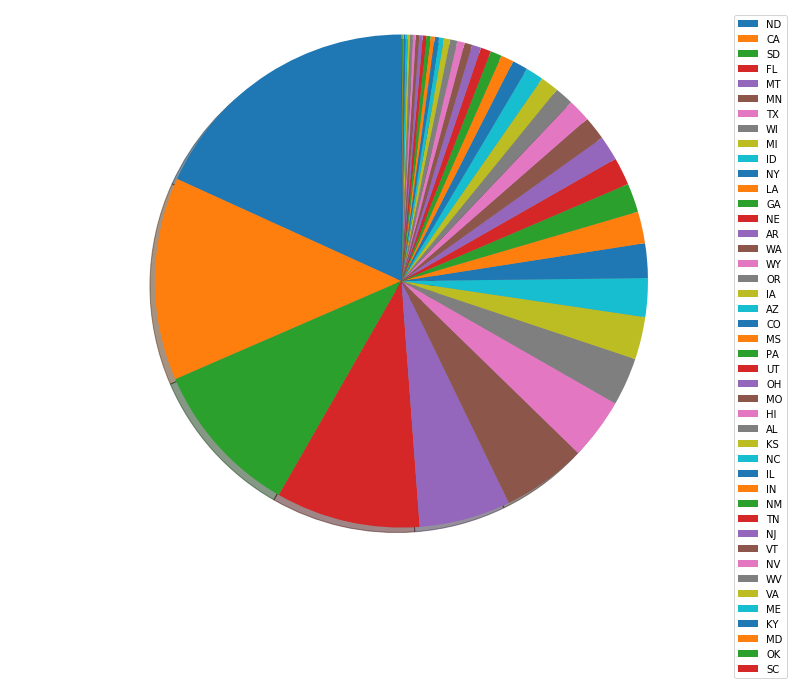

In [186]:
plt.figure(figsize=(14,10))
patches, texts = plt.pie(total_byState['totalprod'], shadow=True, startangle=90)
plt.legend(patches, total_byState['state'], loc="best")
plt.axis('equal')

plt.show()

+ the states ND(North Dakota),CA(California) and SD(South Dakota) are the 3 major producers as apiculture is one of the major livelihoods in these states, while the states MD,OK and SC contribute least to the honey production in USA.

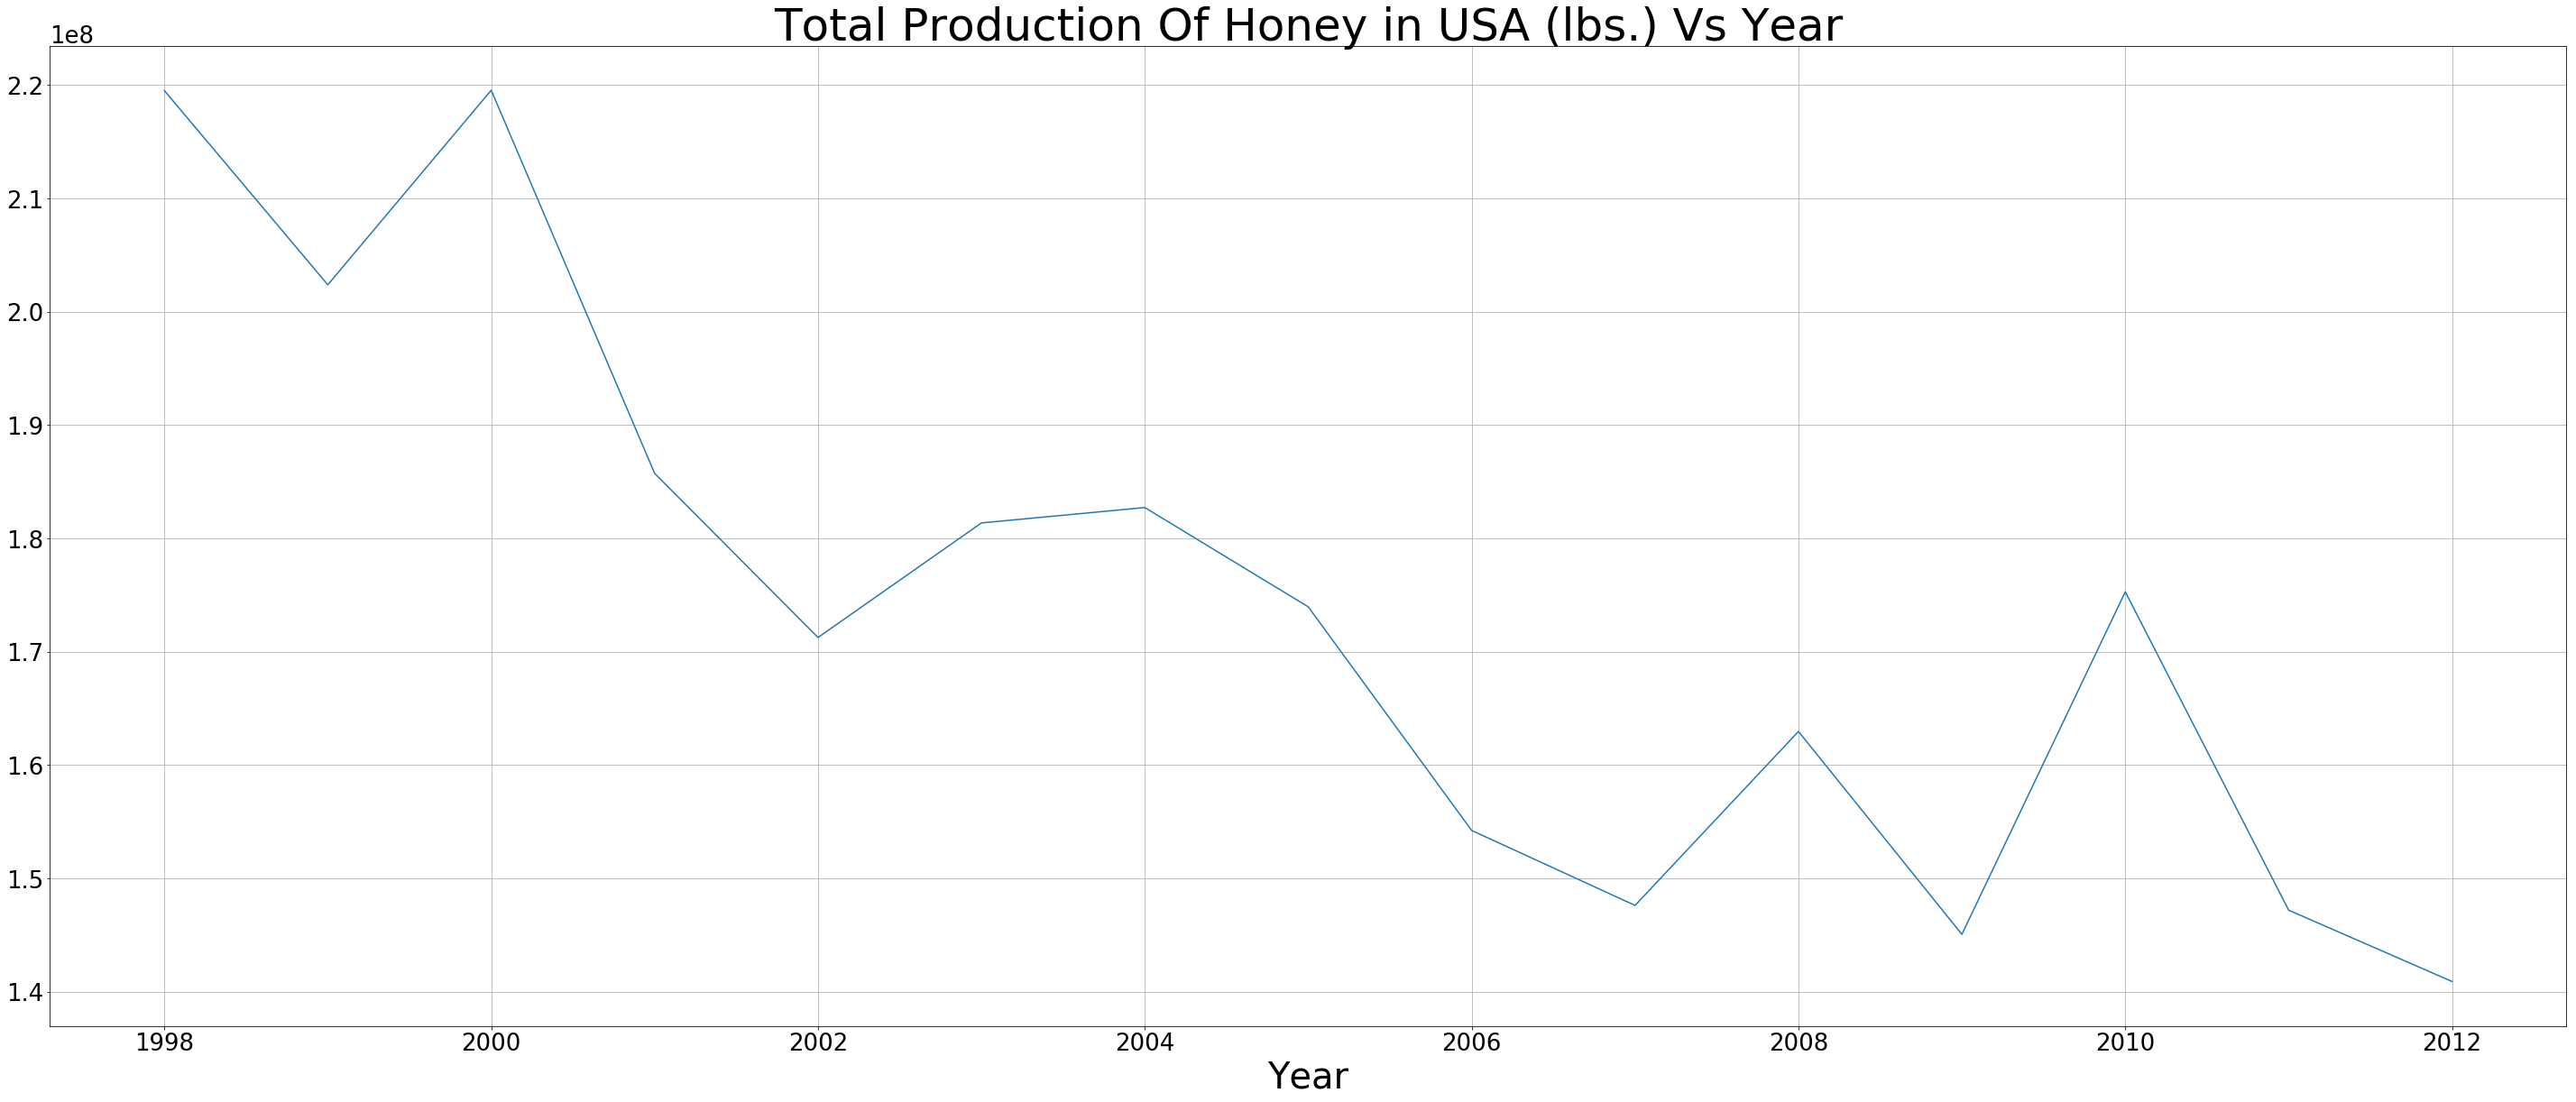

In [187]:
# Group the dataset by year and use the sum method to get the total honey production in USA every year.
total_byYear = data[['totalprod','year']].groupby('year').sum()
total_byYear.reset_index(inplace=True)

plt.figure(figsize=(50,20))
plt.plot(total_byYear['year'], total_byYear['totalprod'])
plt.title('Total Production Of Honey in USA (lbs.) Vs Year',fontsize=50)
plt.xlabel('Year',fontsize = 40)
plt.grid(True)



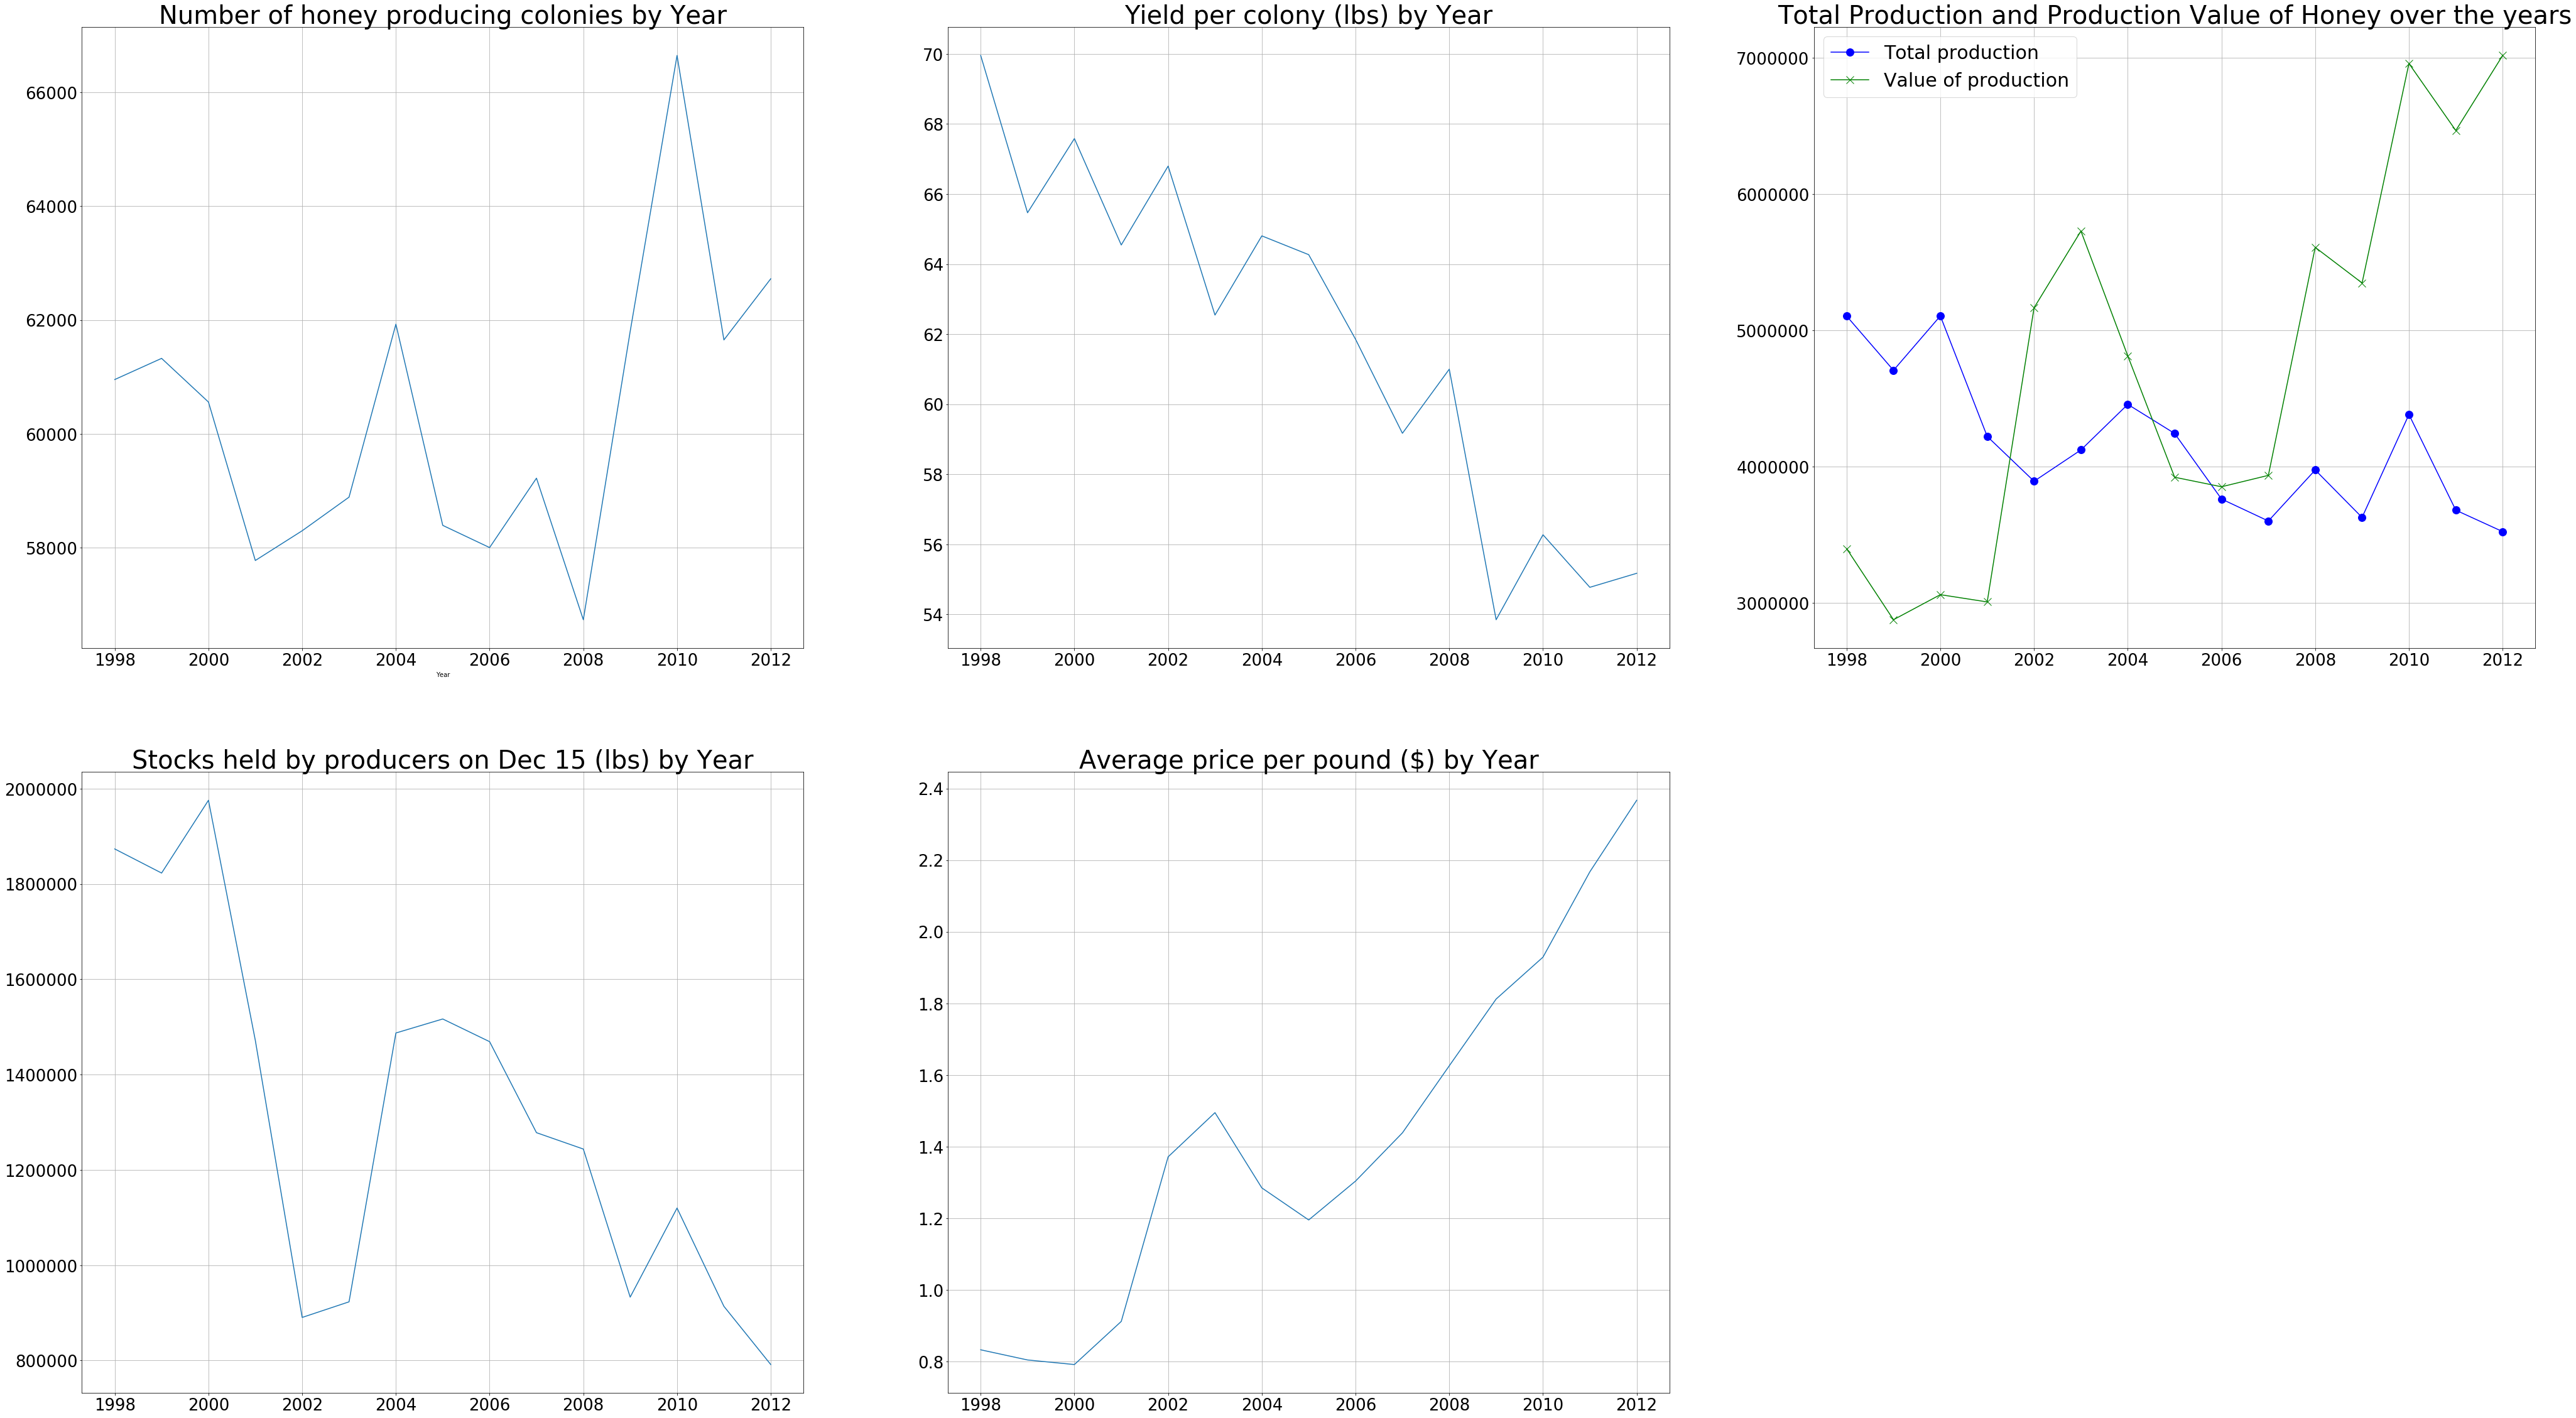

In [188]:
mean_byYear = data[['numcol','yieldpercol', 'totalprod','stocks','priceperlb','prodvalue','year']].groupby('year').mean()
mean_byYear.reset_index(inplace=True)

plt.figure(figsize=(70,40))
plt.subplot(231)
plt.plot(mean_byYear['year'], mean_byYear['numcol'])
plt.title('Number of honey producing colonies by Year',fontsize=40)
plt.xlabel('Year')
plt.grid(True)

plt.subplot(232)
plt.plot(mean_byYear['year'], mean_byYear['yieldpercol'])
plt.title('Yield per colony (lbs) by Year',fontsize=40)

plt.grid(True)

plt.subplot(233)
plt.plot(mean_byYear['year'], mean_byYear['totalprod'], c='b', marker='o',markersize=12, label='Total production')
plt.plot(mean_byYear['year'], mean_byYear['prodvalue'], c ='g',marker='x',markersize=12, label='Value of production')
plt.legend(loc=2,fontsize = 30)
plt.title('Total Production and Production Value of Honey over the years',fontsize = 40)

plt.grid(True)

plt.subplot(234)
plt.plot(mean_byYear['year'], mean_byYear['stocks'])
plt.title('Stocks held by producers on Dec 15 (lbs) by Year',fontsize=40)

plt.grid(True)

plt.subplot(235)
plt.plot(mean_byYear['year'], mean_byYear['priceperlb'])
plt.title('Average price per pound ($) by Year',fontsize=40)

plt.grid(True)


+ It is seen that the production value during the period 2005-2007 has taken a major hit. Also the demand for honey after the above period has increased ,this can be attributed to the slow recovery of the total production of honey against the sharp rise of the price for honey.


In [189]:
# finding out maximum production values by state
state_max =data[['state','totalprod']].groupby('state').max()
state_max.reset_index(level=0,inplace=True)
state_max.columns = ['State','Max Prod']
state_max.head()

,State,Max Prod
0,AL,1248000.0
1,AR,4900000.0
2,AZ,3300000.0
3,CA,37350000.0
4,CO,2700000.0


In [190]:
# finding out minimum production values by state
state_min = data[['state','totalprod']].groupby('state').min()
state_min.reset_index(level=0,inplace=True)
state_min.columns = ['State','Min Prod']
state_min.head()

,State,Min Prod
0,AL,432000.0
1,AR,1368000.0
2,AZ,1012000.0
3,CA,11550000.0
4,CO,1200000.0


In [191]:
# merging maximum and minimum dataframe to find the range
state_range = pd.merge(state_max,state_min,how='inner',on='State')
state_range.head()

,State,Max Prod,Min Prod
0,AL,1248000.0,432000.0
1,AR,4900000.0,1368000.0
2,AZ,3300000.0,1012000.0
3,CA,37350000.0,11550000.0
4,CO,2700000.0,1200000.0


Text(0,0.5,'% Decline')

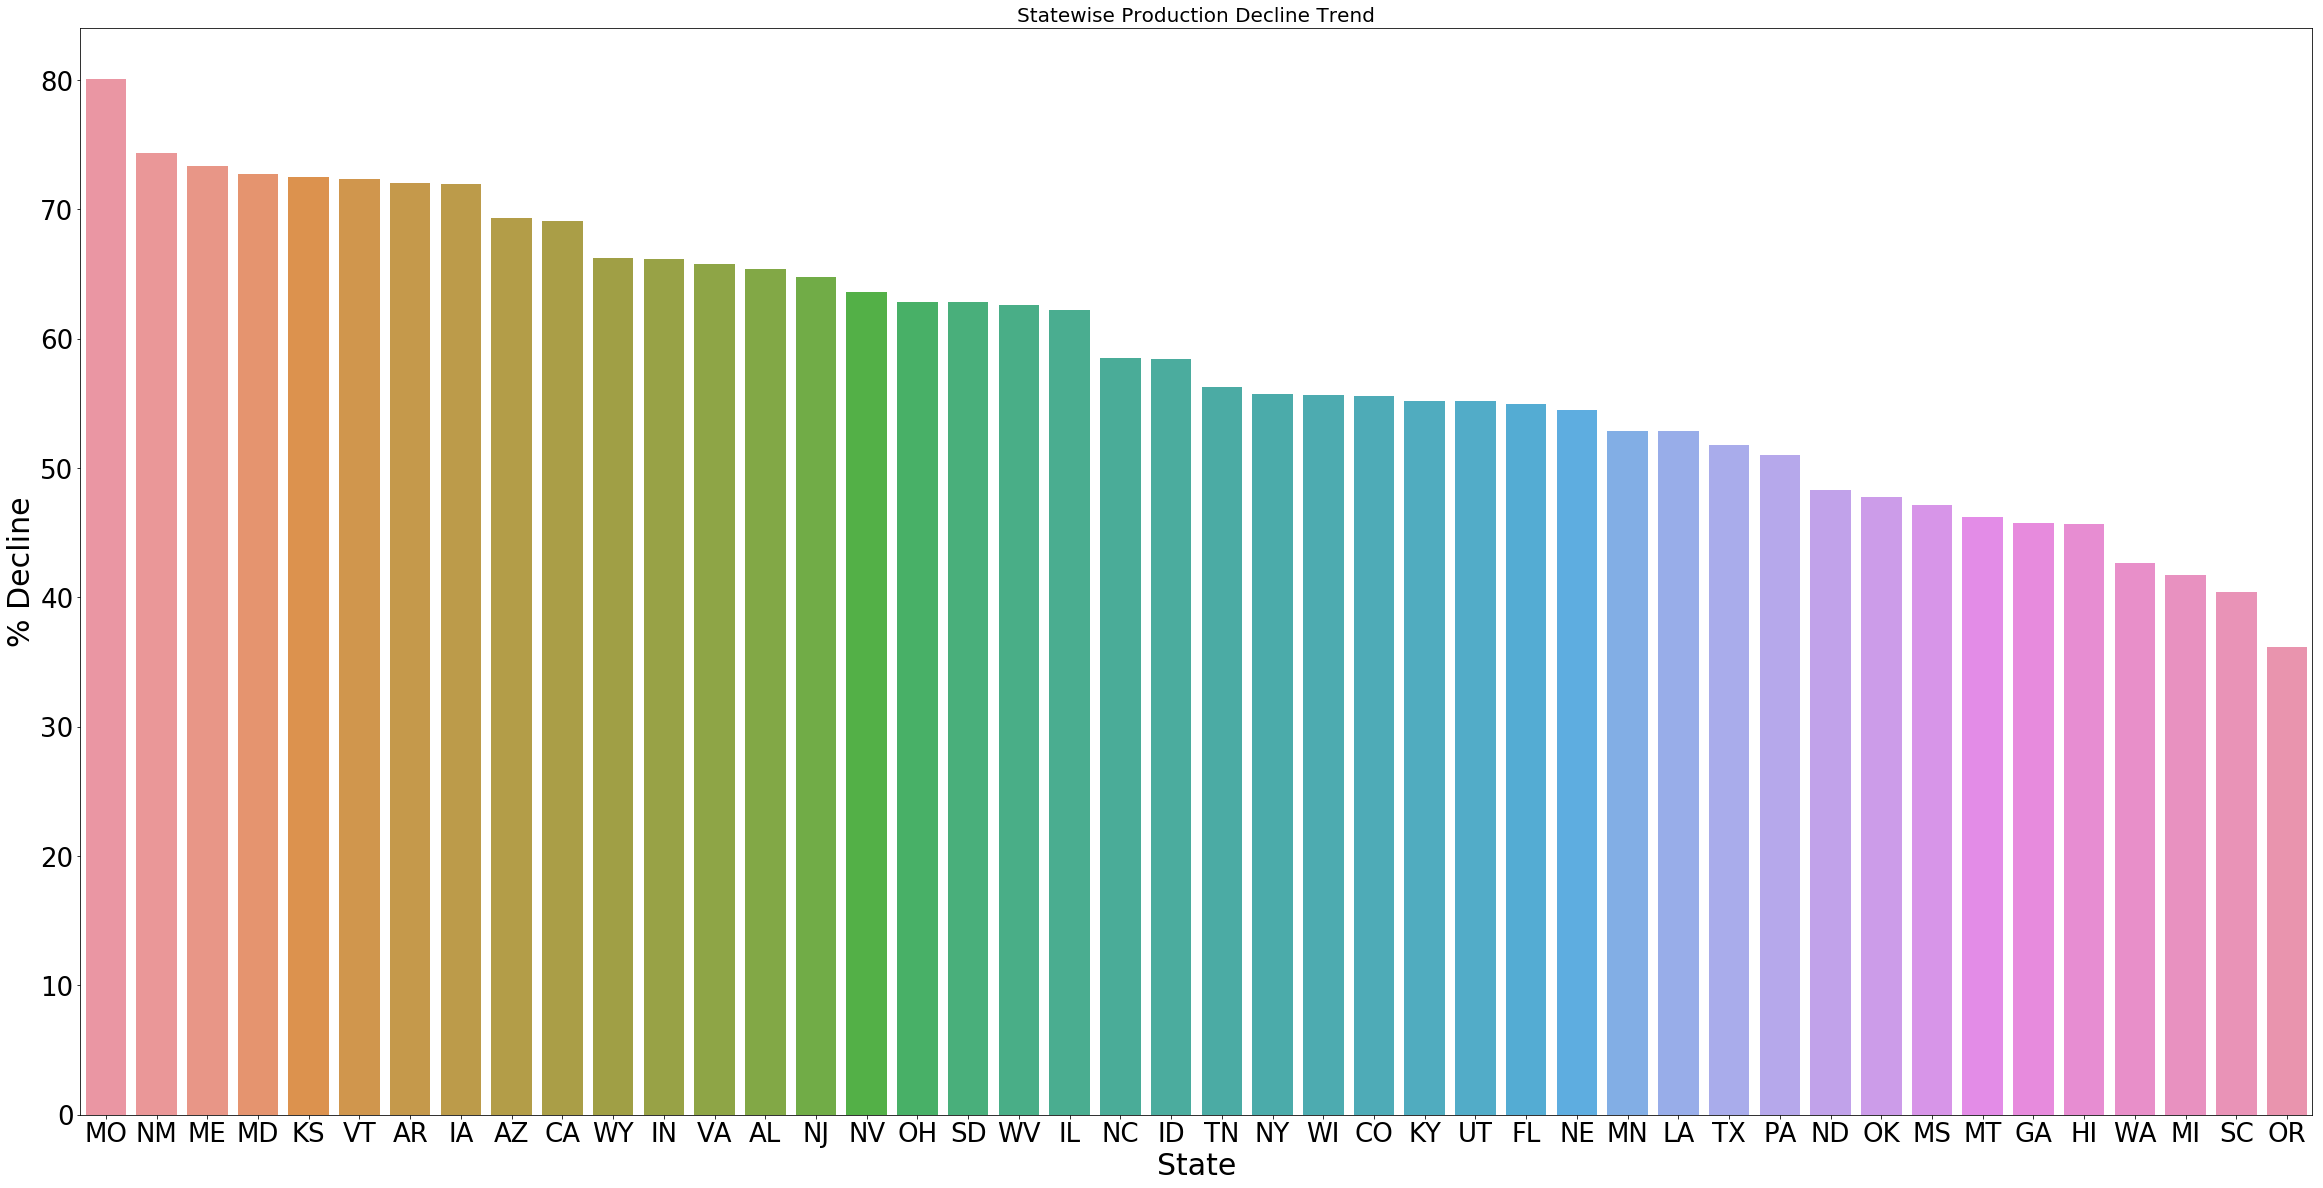

In [192]:
state_range['Change Percentage'] = ((state_range['Max Prod']-state_range['Min Prod'])/state_range['Max Prod'])*100
state_range.sort_values(by='Change Percentage',ascending=False,inplace=True)

plt.figure(figsize=(40,20))
sns.barplot(x='State',y='Change Percentage',data= state_range)
plt.title('Statewise Production Decline Trend',fontsize=20)
plt.xlabel("State",fontsize=30)
plt.ylabel("% Decline",fontsize=30)

+ MO, NM and ME are the top three state with highest decline in honey production

<Figure size 432x504 with 0 Axes>

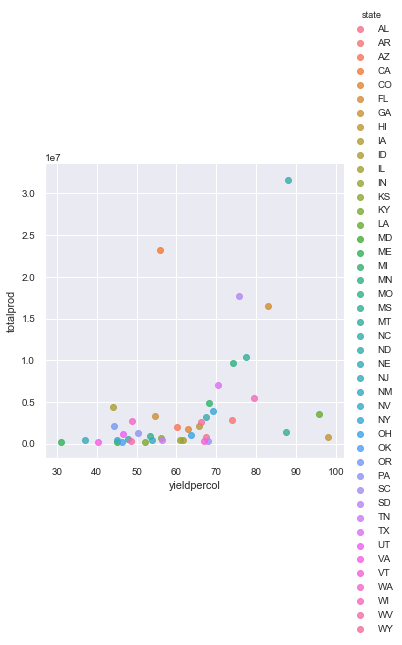

In [223]:


mean_byState = data[['numcol','yieldpercol', 'totalprod','stocks','priceperlb','prodvalue','year','state']].groupby('state').mean()
mean_byState.reset_index(inplace=True)
plt.figure(figsize=(6,7))
sns.lmplot(x = 'yieldpercol', y = 'totalprod',data = mean_byState,fit_reg=False,hue='state')
plt.show()

+ totalprod = numcol * yieldpercol. the relationship between tableprod and yieldpercol can represent numcol(numver of honey producing colonies)